# MNIST fashion data classification task

## Data Preprocessing

### Imports

In [3]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors

from xgboost import XGBClassifier

%matplotlib inline
%qtconsole

### Load Dataset

In [8]:
dataset = pd.read_csv(r"..\data\fashionmnist\fashion-mnist_train.csv")
dataset = dataset.sample(frac = 0.05) #Working only on 3000 images for now. Total images = 60000. Each label have 6000 records
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15035,2,0,0,0,0,0,0,0,0,0,...,0,0,0,138,178,0,0,0,0,0
1865,2,0,0,0,0,0,0,0,0,0,...,15,13,11,33,0,0,0,0,0,0
12458,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43919,0,0,0,0,0,0,0,0,0,0,...,103,79,51,0,0,2,0,0,0,0
14912,2,0,0,0,0,0,0,0,0,0,...,2,0,24,86,17,18,0,0,0,0


In [9]:
dataset["label"].value_counts() #label count in dataset

9    318
6    314
4    313
1    309
2    303
7    297
0    294
5    287
8    285
3    280
Name: label, dtype: int64

In [7]:
#Describing numerical data 
display(dataset.select_dtypes(include=[np.number]).describe())
#Describing categorical data: Won't work here as the data set doesn't have categorical data
#display(dataset.select_dtypes(include=[np.object]).describe())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [12]:
#Visualising Features
#This will count the frequency of each pixel in data set. For eg: Pixel 12 has 0 intensity more than 35000 times and 50 intensity around 2500 times. 
#data_viz(dataset)

In [13]:
#Visualising fields with repect to target
#Each pixel count for each label across whole data set. For eg. Pixel 15 for label 0 with some value across all dataset. x-axis in each pixel denotes the intensity.  
#data_viz_target(dataset, "label")

### Dividing labels into independent values and target class

In [17]:
X = dataset.iloc[:,1:]
#Converting Y to np.array for confusion matrix
Y = np.array(dataset["label"])
display(Y)

array([2, 2, 8, ..., 4, 0, 1], dtype=int64)

In [20]:
#Normalising the grayscale values. Typically 0=black and 255=white
X = X/255
display(X)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15035,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.541176,0.698039,0.000000,0.000000,0.0,0.0,0.0
1865,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.301961,...,0.058824,0.050980,0.043137,0.129412,0.000000,0.000000,0.000000,0.0,0.0,0.0
12458,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
43919,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.117647,...,0.403922,0.309804,0.200000,0.000000,0.000000,0.007843,0.000000,0.0,0.0,0.0
14912,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.007843,0.000000,0.094118,0.337255,0.066667,0.070588,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47020,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011765,0.000000,0.043137,0.764706,0.764706,0.447059,0.0,0.0,0.0
22402,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25719,0.0,0.0,0.0,0.000000,0.003922,0.0,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0
3671,0.0,0.0,0.0,0.007843,0.007843,0.0,0.007843,0.011765,0.015686,0.000000,...,0.360784,0.294118,0.498039,0.152941,0.000000,0.000000,0.000000,0.0,0.0,0.0


### Split the data into a training set, a vaidation set, and a test set.

In [22]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8)

X_train_plus_valid, X_test, y_train_plus_valid, y_test\
    = train_test_split(X, Y, random_state=0, train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

### Applying Algorithms

#### Decision Tree

**Train**

In [23]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy")
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Visualise the decision tree

In [24]:
#Skipping as it takes a lot of time
#feature_names = list(X_train.columns)
#visualize_tree(my_tree, feature_names, fileName='dt_over.png')
#Image(filename='dt_over.png') 

#### Evaluating Model Performance on training set

In [25]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
# pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       151
           5       1.00      1.00      1.00       157
           6       1.00      1.00      1.00       151
           7       1.00      1.00      1.00       149
           8       1.00      1.00      1.00       136
           9       1.00      1.00      1.00       163

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Confusion Matrix
[[138   0   0   0   0   0   0   0   0   0]
 [  0 162   0   0   0   0   0   0   0   0]
 [  0   0 152   0   0   0   0   0   0   0]
 [  0   0   0 141   0   0   0   0   0   0]
 [  0   0   0   0 151   0   0   0   0 

#### Evaluating Model Performance on validation dataset

In [26]:
# Make a set of predictions for the validation data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
#pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.62      0.44      0.51        66
           1       0.83      0.95      0.89        65
           2       0.56      0.41      0.48        58
           3       0.69      0.65      0.67        69
           4       0.61      0.64      0.62        61
           5       0.75      0.77      0.76        43
           6       0.44      0.57      0.50        67
           7       0.80      0.89      0.84        54
           8       0.74      0.80      0.77        50
           9       0.94      0.87      0.90        67

    accuracy                           0.69       600
   macro avg       0.70      0.70      0.69       600
weighted avg       0.69      0.69      0.69       600

Confusion Matrix
[[29  3  3  6  1  0 21  1  2  0]
 [ 0 62  0  1  0  0  2  0  0  0]
 [ 4  0 24  3 12  2 12  0  1  0]
 [ 3  9  2 45  2  0  4  0  4  0]
 [ 0  0  8  3 39  0  8  0  3  0]
 [ 0  0  0  0  0 33  0  5  4  

#### Evaluating Model Performance on test set

In [27]:
# Make a set of predictions for the validation data
y_pred = my_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6844444444444444
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        90
           1       0.90      0.90      0.90        82
           2       0.61      0.55      0.58        93
           3       0.62      0.64      0.63        70
           4       0.53      0.52      0.53       101
           5       0.74      0.80      0.77        87
           6       0.43      0.43      0.43        96
           7       0.77      0.77      0.77        94
           8       0.78      0.83      0.80        99
           9       0.86      0.86      0.86        88

    accuracy                           0.68       900
   macro avg       0.69      0.69      0.69       900
weighted avg       0.68      0.68      0.68       900

Confusion Matrix
[[52  2  1  8  3  0 19  0  5  0]
 [ 2 74  0  5  0  0  0  1  0  0]
 [ 2  0 51  1 23  0 14  0  1  1]
 [ 9  5  1 45  2  0  7  0  1  0]
 [ 1  0 18 11 53  0 13  0  5  0]
 [ 0  0  0  0  0 70  0  8  5  

### Alternative Trees: Pruning Decision Tree

**max_depth=2**

In [28]:
dt_pruned = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 2)
dt_pruned = dt_pruned.fit(X_train,y_train)

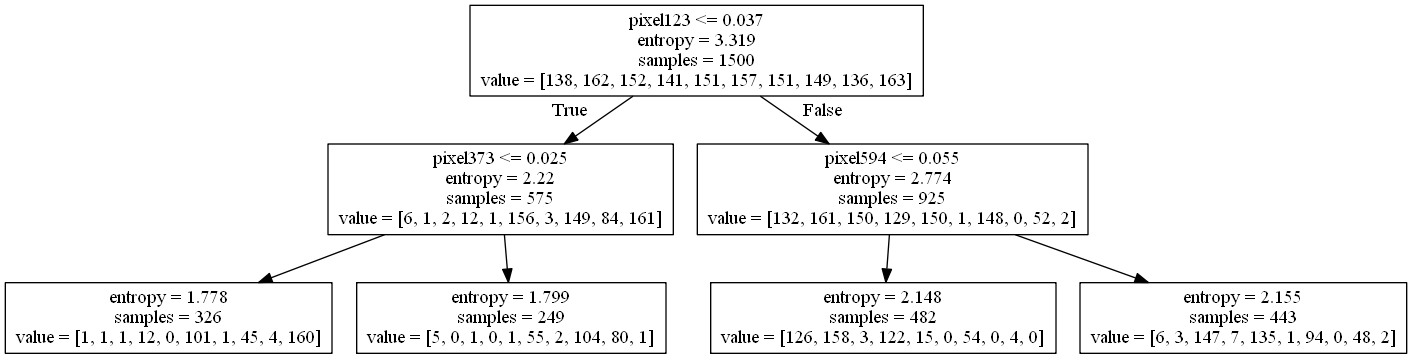

In [30]:
# visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(dt_pruned, feature_names, fileName="dt_under.png")
Image(filename='dt_under.png') 

#### Evaluating model performance on training set

In [31]:
# Make a set of predictions for the training data
y_pred = dt_pruned.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

print(metrics.confusion_matrix(y_train, y_pred))

Accuracy: 0.37933333333333336
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.33      0.98      0.49       162
           2       0.33      0.97      0.49       152
           3       0.00      0.00      0.00       141
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00       157
           6       0.00      0.00      0.00       151
           7       0.42      0.70      0.52       149
           8       0.00      0.00      0.00       136
           9       0.49      0.98      0.65       163

    accuracy                           0.38      1500
   macro avg       0.16      0.36      0.22      1500
weighted avg       0.16      0.38      0.23      1500

[[  0 126   6   0   0   0   0   5   0   1]
 [  0 158   3   0   0   0   0   0   0   1]
 [  0   3 147   0   0   0   0   1   0   1]
 [  0 122   7   0   0   0   0   0   0  12]
 [  0  15 135   0   0   0   0   1   0  

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Evaluating model performance on validation set

In [32]:
# Make a set of predictions for the test data
y_pred = dt_pruned.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

print(metrics.confusion_matrix(y_valid, y_pred))

Accuracy: 0.36666666666666664
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.29      0.98      0.44        65
           2       0.32      0.90      0.47        58
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        67
           7       0.42      0.74      0.53        54
           8       0.00      0.00      0.00        50
           9       0.55      0.96      0.70        67

    accuracy                           0.37       600
   macro avg       0.16      0.36      0.21       600
weighted avg       0.16      0.37      0.22       600

[[ 0 59  2  0  0  0  0  4  0  1]
 [ 0 64  1  0  0  0  0  0  0  0]
 [ 0  4 52  0  0  0  0  1  0  1]
 [ 0 58  4  0  0  0  0  0  0  7]
 [ 0 10 50  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 18  0 25]
 [ 0 26 40  0

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Evaluating model performance on test set

In [33]:
# Make a set of predictions for the validation data
y_pred = dt_pruned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.3611111111111111
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.29      0.96      0.45        82
           2       0.32      0.96      0.48        93
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        96
           7       0.39      0.79      0.52        94
           8       0.00      0.00      0.00        99
           9       0.52      0.94      0.67        88

    accuracy                           0.36       900
   macro avg       0.15      0.37      0.21       900
weighted avg       0.15      0.36      0.21       900

Confusion Matrix
[[ 0 81  4  0  0  0  0  5  0  0]
 [ 0 79  0  0  0  0  0  1  0  2]
 [ 0  4 89  0  0  0  0  0  0  0]
 [ 0 58  2  0  0  0  0  0  0 10]
 [ 0 17 82  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0 44  0 4

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Parameter Tuning

__1. Cross Validation__

In [36]:
my_tree = tree.DecisionTreeClassifier(max_depth = 2)
scores = cross_val_score(my_tree, X_train_plus_valid, y_train_plus_valid, cv=10)
print(scores)
print(scores.mean(), " =/- ", scores.std())

[0.36619718 0.35680751 0.34433962 0.36966825 0.36190476 0.38571429
 0.33971292 0.35096154 0.352657   0.34782609]
0.35757891604510006  =/-  0.01299591779621669


__2. Grid Search__

In [39]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [100, 200, 300, 400]}

# Perform the search
my_tuned_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=5, verbose = 2, \
                            return_train_score = True)
my_tuned_tree.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
display(my_tuned_tree.best_score_)
display(my_tuned_tree.cv_results_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.4s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=100 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=100, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=200, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=200, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=200, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=200 ..............

[CV]  criterion=gini, max_depth=9, min_samples_split=400, total=   0.4s
[CV] criterion=gini, max_depth=12, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=100, total=   0.8s
[CV] criterion=gini, max_depth=12, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=100, total=   0.7s
[CV] criterion=gini, max_depth=12, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=100, total=   0.8s
[CV] criterion=gini, max_depth=12, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=100, total=   0.8s
[CV] criterion=gini, max_depth=12, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=100, total=   0.7s
[CV] criterion=gini, max_depth=12, min_samples_split=200 .............
[CV]  criterion=gini, max_depth=12, min_samples_split=200, total=   0.5s
[CV] criterion=gini, max_depth=12, min_samples_split=200 .......

[CV]  criterion=gini, max_depth=18, min_samples_split=400, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=400, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=400, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_split=400 .............
[CV]  criterion=gini, max_depth=18, min_samples_split=400, total=   0.4s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=100 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=100, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=10

[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=300 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=400 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=400 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=400 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=9, min_samples_split=400 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=400, total=   0.7s
[CV] criterion=entropy, max_depth=9, min_samples_split=400 ...........
[CV]  criterion=entropy, max_depth=9, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=12, min_samples

[CV]  criterion=entropy, max_depth=18, min_samples_split=200, total=   1.0s
[CV] criterion=entropy, max_depth=18, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=300, total=   0.9s
[CV] criterion=entropy, max_depth=18, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_samples_split=300 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=300, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_samples_split=400 ..........
[CV]  criterion=entropy, max_depth=18, min_samples_split=400, total=   0.8s
[CV] criterion=entropy, max_depth=18, min_

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.9min finished


Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 100}

0.6857142857142857

{'mean_fit_time': array([0.34015856, 0.33310652, 0.31990061, 0.29816189, 0.62337341,
        0.50263495, 0.41859241, 0.37875533, 0.73522644, 0.48709445,
        0.40042534, 0.38169737, 0.7563663 , 0.50107818, 0.42098079,
        0.37674623, 0.75313296, 0.52582798, 0.42000618, 0.38847985,
        0.76848817, 0.50042744, 0.41876392, 0.38051405, 0.71995339,
        0.71642094, 0.68376889, 0.61969419, 1.29905925, 1.00668235,
        0.8102766 , 0.74659753, 1.3555481 , 1.02072639, 0.85171781,
        0.74719958, 1.36187816, 1.01657996, 0.84333339, 0.74890347,
        1.36739082, 1.02267094, 0.84204917, 0.74866614, 1.37346306,
        1.03076091, 0.85025206, 0.76684632]),
 'std_fit_time': array([0.01051412, 0.00135026, 0.01314848, 0.00424929, 0.00939058,
        0.01674723, 0.01691431, 0.02829433, 0.01793719, 0.01952587,
        0.03168334, 0.0192807 , 0.02288224, 0.01789546, 0.01864414,
        0.02515656, 0.01333353, 0.01271546, 0.01706378, 0.03214837,
        0.02947697, 0.01596858, 0.017

#### Evaluating model performance on tuned tree

In [40]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
# Print confusion matrix
print("Confusion Matrix")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7011111111111111
Confusion Matrix
              precision    recall  f1-score   support

           0       0.60      0.80      0.68        90
           1       0.84      0.90      0.87        82
           2       0.62      0.47      0.54        93
           3       0.64      0.74      0.69        70
           4       0.53      0.61      0.57       101
           5       0.72      0.79      0.75        87
           6       0.63      0.34      0.45        96
           7       0.82      0.77      0.79        94
           8       0.78      0.81      0.79        99
           9       0.88      0.83      0.85        88

    accuracy                           0.70       900
   macro avg       0.71      0.71      0.70       900
weighted avg       0.70      0.70      0.69       900



### Comparing Models

#### Random Forests

In [41]:
r_forest = ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200, n_jobs = -1)
r_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [45]:
# Make a set of predictions for the test data
y_pred = r_forest.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
# Print confusion matrix
print("Confusion Matrix")
print(metrics.classification_report(y_valid, y_pred))

Accuracy: 0.6716666666666666
Confusion Matrix
              precision    recall  f1-score   support

           0       0.64      0.86      0.74        66
           1       0.67      0.95      0.78        65
           2       0.45      0.64      0.53        58
           3       0.77      0.43      0.56        69
           4       0.46      0.57      0.51        61
           5       0.94      0.70      0.80        43
           6       0.50      0.06      0.11        67
           7       0.81      0.87      0.84        54
           8       0.85      0.82      0.84        50
           9       0.80      0.90      0.85        67

    accuracy                           0.67       600
   macro avg       0.69      0.68      0.65       600
weighted avg       0.68      0.67      0.64       600



#### Grid Search

In [46]:
rforest_grid = [{'max_features': list(range(2, 30, 2)), 'n_estimators': list(range(50, 310, 50)), 'min_samples_split': [100]}]
my_tuned_forest = GridSearchCV(ensemble.RandomForestClassifier(), rforest_grid, cv=5, verbose = 2, n_jobs=-1)
my_tuned_forest.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_forest.best_params_)
print(my_tuned_forest.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.2min finished


Best parameters set found on development set:
{'max_features': 12, 'min_samples_split': 100, 'n_estimators': 300}
0.7776190476190477


#### Model Evaluation on Test Set

In [47]:
# Make a set of predictions for the test data
y_pred = my_tuned_forest.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
# Print confusion matrix
print("Confusion Matrix")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7822222222222223
Confusion Matrix
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        90
           1       1.00      0.95      0.97        82
           2       0.61      0.63      0.62        93
           3       0.68      0.94      0.79        70
           4       0.54      0.66      0.59       101
           5       0.93      0.93      0.93        87
           6       0.65      0.27      0.38        96
           7       0.87      0.88      0.88        94
           8       0.92      0.89      0.90        99
           9       0.92      0.94      0.93        88

    accuracy                           0.78       900
   macro avg       0.79      0.79      0.78       900
weighted avg       0.79      0.78      0.77       900



#### Bagging

In [48]:
# Do the same job with random forests
my_bag_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
my_bag_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),


In [49]:
# Make a set of predictions for the test data
y_pred = my_bag_model.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        66
           1       0.96      0.85      0.90        65
           2       0.56      0.62      0.59        58
           3       0.62      0.80      0.70        69
           4       0.47      0.59      0.53        61
           5       0.66      0.77      0.71        43
           6       0.88      0.22      0.36        67
           7       0.74      0.78      0.76        54
           8       0.83      0.76      0.79        50
           9       0.79      0.84      0.81        67

    accuracy                           0.69       600
   macro avg       0.72      0.70      0.69       600
weighted avg       0.72      0.69      0.68       600

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,50,0,1,10,0,3,0,0,2,0,66
1,0,55,0,9,1,0,0,0,0,0,65
2,2,0,36,0,18,1,0,0,1,0,58
3,2,1,2,55,1,5,0,0,1,2,69
4,0,0,15,7,36,0,2,0,1,0,61
5,0,0,0,0,0,33,0,4,2,4,43
6,19,1,9,6,16,0,15,0,1,0,67
7,0,0,0,0,0,4,0,42,0,8,54
8,0,0,0,2,4,3,0,2,38,1,50


#### Grid Search

In [50]:
# Set up the parameter grid to seaerch
bagging_grid = [{'n_estimators': list(range(50, 310, 50)), 'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy", max_depth = 50, min_samples_leaf = 200)]}]

# Perform the search
bag_tuned = GridSearchCV(ensemble.BaggingClassifier(), bagging_grid, cv=5, verbose = 2, n_jobs = -1)
bag_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(bag_tuned.best_params_)
print(bag_tuned.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


Best parameters set found on development set:
{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'n_estimators': 50}
0.3838095238095238


In [51]:
# Make a set of predictions for the test data
y_pred = bag_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.5222222222222223
              precision    recall  f1-score   support

           0       0.55      0.86      0.67        90
           1       0.59      0.95      0.73        82
           2       0.55      0.80      0.65        93
           3       0.00      0.00      0.00        70
           4       0.40      0.50      0.44       101
           5       0.00      0.00      0.00        87
           6       0.50      0.02      0.04        96
           7       0.44      0.84      0.58        94
           8       0.81      0.25      0.38        99
           9       0.56      0.95      0.71        88

    accuracy                           0.52       900
   macro avg       0.44      0.52      0.42       900
weighted avg       0.45      0.52      0.43       900

Confusion Matrix


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,0,1,2,4,5,6,7,8,9,All
True,,,,,,,,,,
0,77,6,2,1,0,0,4,0,0,90
1,2,78,1,0,0,0,0,0,1,82
2,3,0,74,15,0,0,0,1,0,93
3,20,37,3,0,0,1,0,0,9,70
4,11,5,30,51,0,1,0,3,0,101
5,0,0,0,0,0,0,48,0,39,87
6,28,4,16,43,0,2,2,1,0,96
7,0,0,0,0,1,0,79,0,14,94
8,0,1,9,19,0,0,43,25,2,99


#### AdaBoost

In [52]:
my_ada_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=50,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                      

In [54]:
# Make a set of predictions for the test data
y_pred = my_ada_model.predict(X_valid)

# Print performance details
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.5222222222222223
              precision    recall  f1-score   support

           0       0.60      0.44      0.51        66
           1       1.00      0.91      0.95        65
           2       0.63      0.57      0.60        58
           3       0.78      0.74      0.76        69
           4       0.56      0.54      0.55        61
           5       0.65      0.84      0.73        43
           6       0.33      0.51      0.40        67
           7       0.75      0.74      0.75        54
           8       0.90      0.94      0.92        50
           9       0.89      0.73      0.80        67

    accuracy                           0.69       600
   macro avg       0.71      0.70      0.70       600
weighted avg       0.71      0.69      0.69       600

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,29,0,2,2,0,0,32,0,1,0,66
1,0,59,1,4,0,0,1,0,0,0,65
2,0,0,33,0,10,0,13,0,2,0,58
3,5,0,3,51,2,0,8,0,0,0,69
4,0,0,8,6,33,0,13,0,1,0,61
5,0,0,0,0,0,36,0,6,1,0,43
6,14,0,4,1,14,0,34,0,0,0,67
7,0,0,0,0,0,8,0,40,0,6,54
8,0,0,0,1,0,1,1,0,47,0,50


#### Grid Search

In [55]:
# Set up the parameter grid to seaerch
ada_grid = [ {'n_estimators': list(range(10, 200, 10))}]
              #, 'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_leaf = 200)]}


# Perform the search
ada_tuned = GridSearchCV(ensemble.AdaBoostClassifier(), ada_grid, cv=5, verbose = 2)
ada_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(ada_tuned.best_params_)
print(ada_tuned.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   2.5s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   2.4s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   2.5s
[CV] n_estimators=20 .................................................
[CV] .

[CV] ................................. n_estimators=120, total=  14.6s
[CV] n_estimators=130 ................................................
[CV] ................................. n_estimators=130, total=  15.6s
[CV] n_estimators=130 ................................................
[CV] ................................. n_estimators=130, total=  15.4s
[CV] n_estimators=130 ................................................
[CV] ................................. n_estimators=130, total=  15.4s
[CV] n_estimators=130 ................................................
[CV] ................................. n_estimators=130, total=  15.9s
[CV] n_estimators=130 ................................................
[CV] ................................. n_estimators=130, total=  15.8s
[CV] n_estimators=140 ................................................
[CV] ................................. n_estimators=140, total=  16.7s
[CV] n_estimators=140 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed: 19.1min finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
{'n_estimators': 10}
0.3357142857142857


In [56]:
# Make a set of predictions for the test data
y_pred = ada_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.23666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.57      0.05      0.09        82
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00       101
           5       0.42      0.17      0.24        87
           6       0.17      0.88      0.28        96
           7       0.29      0.86      0.43        94
           8       0.41      0.28      0.34        99
           9       0.20      0.01      0.02        88

    accuracy                           0.24       900
   macro avg       0.21      0.23      0.14       900
weighted avg       0.21      0.24      0.15       900

Confusion Matrix


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,1,5,6,7,8,9,All
True,,,,,,,
0,1,1,80,0,8,0,90
1,4,0,75,0,3,0,82
2,0,0,90,2,1,0,93
3,0,0,60,0,10,0,70
4,0,0,98,1,2,0,101
5,0,15,0,67,4,1,87
6,2,0,84,3,7,0,96
7,0,13,0,81,0,0,94
8,0,4,16,48,28,3,99


#### Logistic Regression

In [57]:
my_reg_model = linear_model.LogisticRegression()
my_reg_model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# Make a set of predictions for the test data
y_pred = my_reg_model.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7866666666666666
Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,50,1,0,5,0,0,9,0,1,0,66
1,1,61,1,1,1,0,0,0,0,0,65
2,1,0,35,0,14,0,7,0,1,0,58
3,5,3,2,49,1,0,7,0,2,0,69
4,0,0,8,4,38,0,9,0,2,0,61
5,0,0,0,0,0,38,0,1,1,3,43
6,12,0,7,0,10,0,38,0,0,0,67
7,0,0,0,0,0,4,0,49,0,1,54
8,0,0,0,0,0,0,1,0,49,0,50


#### Grid Search

In [65]:
# Set up the parameter grid to seaerch
reg_grid = [ {'multi_class': ['ovr'],  'C': [x / 10.0 for x in range(2, 21, 2)], 'solver':['liblinear'], 'max_iter':[100]}]

# Perform the search
reg_tuned = GridSearchCV(linear_model.LogisticRegression(), reg_grid, cv=5, verbose = 2, n_jobs=-1)
reg_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(reg_tuned.best_params_)
print(reg_tuned.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.5s finished


Best parameters set found on development set:
{'C': 0.2, 'max_iter': 100, 'multi_class': 'ovr', 'solver': 'liblinear'}
0.8071428571428572


In [66]:
# Make a set of predictions for the test data
y_pred = reg_tuned.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8188888888888889
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        90
           1       0.98      0.99      0.98        82
           2       0.67      0.63      0.65        93
           3       0.83      0.84      0.84        70
           4       0.62      0.77      0.69       101
           5       0.96      0.90      0.93        87
           6       0.67      0.50      0.57        96
           7       0.87      0.91      0.89        94
           8       0.93      0.92      0.92        99
           9       0.92      0.97      0.94        88

    accuracy                           0.82       900
   macro avg       0.82      0.82      0.82       900
weighted avg       0.82      0.82      0.82       900

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,72,0,2,6,1,0,6,0,3,0,90
1,0,81,0,0,1,0,0,0,0,0,82
2,3,0,59,0,24,0,6,0,1,0,93
3,2,1,0,59,7,0,1,0,0,0,70
4,1,0,11,2,78,0,8,0,1,0,101
5,0,0,0,0,0,78,0,7,0,2,87
6,13,1,15,4,13,0,48,0,2,0,96
7,0,0,0,0,0,3,0,86,0,5,94
8,0,0,1,0,1,0,3,3,91,0,99


#### Nearest Neighbour

In [68]:
# Do the same job with random forests
my_nn_model = neighbors.KNeighborsClassifier()
my_nn_model = my_nn_model.fit(X_train,y_train)

In [69]:
# Make a set of predictions for the test data
y_pred = my_nn_model.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        66
           1       0.94      0.95      0.95        65
           2       0.54      0.66      0.59        58
           3       0.87      0.75      0.81        69
           4       0.58      0.59      0.59        61
           5       0.97      0.77      0.86        43
           6       0.57      0.51      0.54        67
           7       0.88      0.83      0.86        54
           8       0.96      0.88      0.92        50
           9       0.85      1.00      0.92        67

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,48,0,2,2,0,0,13,0,1,0,66
1,1,62,1,0,0,0,1,0,0,0,65
2,1,0,38,0,14,0,5,0,0,0,58
3,5,3,4,52,3,0,2,0,0,0,69
4,0,1,14,5,36,0,5,0,0,0,61
5,0,0,0,0,0,33,0,5,1,4,43
6,15,0,10,0,8,0,34,0,0,0,67
7,0,0,0,0,0,1,0,45,0,8,54
8,1,0,2,1,1,0,0,1,44,0,50


#### Grid Search

In [72]:
# Set up the parameter grid to seaerch
param_grid = [{'n_neighbors': list(range(1, 50, 5))}]

# Perform the search
nn_model = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5, verbose = 2, n_jobs=-1)
nn_model.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(nn_model.best_params_)
print(nn_model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s


Best parameters set found on development set:
{'n_neighbors': 6}
0.7728571428571429


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.9s finished


In [73]:
# Make a set of predictions for the test data
y_pred = nn_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7655555555555555
              precision    recall  f1-score   support

           0       0.72      0.87      0.78        90
           1       0.95      0.95      0.95        82
           2       0.57      0.67      0.62        93
           3       0.82      0.77      0.79        70
           4       0.59      0.62      0.61       101
           5       0.98      0.68      0.80        87
           6       0.57      0.42      0.48        96
           7       0.74      0.93      0.82        94
           8       0.99      0.85      0.91        99
           9       0.87      0.95      0.91        88

    accuracy                           0.77       900
   macro avg       0.78      0.77      0.77       900
weighted avg       0.77      0.77      0.76       900

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,78,0,1,4,0,0,6,0,1,0,90
1,2,78,0,2,0,0,0,0,0,0,82
2,0,1,62,0,24,0,6,0,0,0,93
3,7,1,0,54,4,0,4,0,0,0,70
4,0,1,21,3,63,0,13,0,0,0,101
5,0,0,0,0,0,59,1,20,0,7,87
6,22,1,20,3,10,0,40,0,0,0,96
7,0,0,0,0,0,1,0,87,0,6,94
8,0,0,4,0,5,0,0,6,84,0,99


#### XGBoost

In [75]:
# Do the same job with random forests
my_xg_model = XGBClassifier()
my_xg_model = my_xg_model.fit(X_train,y_train)

In [76]:
# Make a set of predictions for the test data
y_pred = my_xg_model.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8183333333333334
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        66
           1       0.97      0.94      0.95        65
           2       0.75      0.66      0.70        58
           3       0.84      0.78      0.81        69
           4       0.67      0.67      0.67        61
           5       0.91      0.95      0.93        43
           6       0.64      0.69      0.66        67
           7       0.91      0.89      0.90        54
           8       0.94      0.96      0.95        50
           9       0.95      0.93      0.94        67

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.82      0.82      0.82       600

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,52,0,0,3,0,0,10,0,1,0,66
1,2,61,0,1,0,0,1,0,0,0,65
2,1,0,38,0,13,0,5,0,1,0,58
3,5,2,2,54,2,0,4,0,0,0,69
4,0,0,8,6,41,0,6,0,0,0,61
5,0,0,0,0,0,41,0,1,1,0,43
6,15,0,3,0,3,0,46,0,0,0,67
7,0,0,0,0,0,3,0,48,0,3,54
8,0,0,0,0,1,1,0,0,48,0,50


<b> Grid Search </b>

In [79]:
# Set up the parameter grid to seaerch
xg_grid = [{'eta': list(range(0, 1))}]

# Perform the search
xg_tuned = GridSearchCV(XGBClassifier(), xg_grid, cv = 2, verbose = 2, n_jobs=-1)
xg_tuned.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(xg_tuned.best_params_)
print(xg_tuned.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   45.5s finished


Best parameters set found on development set:
{'eta': 0}
0.8014285714285714


In [80]:
y_pred = xg_tuned.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        90
           1       0.98      0.96      0.97        82
           2       0.73      0.70      0.71        93
           3       0.84      0.87      0.85        70
           4       0.63      0.73      0.68       101
           5       0.97      0.95      0.96        87
           6       0.58      0.46      0.51        96
           7       0.91      0.93      0.92        94
           8       0.95      0.89      0.92        99
           9       0.91      0.94      0.93        88

    accuracy                           0.82       900
   macro avg       0.82      0.83      0.82       900
weighted avg       0.82      0.82      0.82       900

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,74,0,2,5,1,0,6,0,2,0,90
1,1,79,0,2,0,0,0,0,0,0,82
2,0,0,65,0,19,0,8,0,1,0,93
3,2,1,0,61,4,0,2,0,0,0,70
4,1,1,10,3,74,0,11,0,1,0,101
5,0,0,0,0,0,83,0,2,0,2,87
6,20,0,11,2,18,0,44,0,1,0,96
7,0,0,0,0,0,1,0,87,0,6,94
8,0,0,1,0,1,2,5,2,88,0,99


**It can be seen that XGBoost has the highest accueracy.**

#### Running best model on test data

In [81]:
test_dataset = pd.read_csv(r"..\data\fashionmnist\fashion-mnist_train.csv")
test_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_test = test_dataset[test_dataset.columns[1:]]
Y_test = np.array(test_dataset["label"])

In [83]:
X_test = X_test/255

In [84]:
best_model = XGBClassifier()
best_model = best_model.fit(X,Y)

In [86]:
# Make a set of predictions for the test data
y_pred = best_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(Y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8415833333333333
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6000
           1       0.99      0.94      0.96      6000
           2       0.73      0.75      0.74      6000
           3       0.83      0.88      0.86      6000
           4       0.75      0.73      0.74      6000
           5       0.96      0.89      0.92      6000
           6       0.63      0.60      0.61      6000
           7       0.88      0.92      0.90      6000
           8       0.94      0.95      0.95      6000
           9       0.91      0.94      0.92      6000

    accuracy                           0.84     60000
   macro avg       0.84      0.84      0.84     60000
weighted avg       0.84      0.84      0.84     60000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,4972,7,63,260,21,9,600,0,67,1,6000
1,29,5650,33,227,22,1,33,0,5,0,6000
2,57,5,4507,48,785,2,549,0,46,1,6000
3,241,34,47,5269,164,2,226,0,17,0,6000
4,27,10,717,292,4364,1,562,0,27,0,6000
5,3,5,1,9,1,5338,3,419,30,191,6000
6,958,7,736,149,439,2,3585,0,123,1,6000
7,0,0,0,0,0,96,0,5518,10,376,6000
8,20,8,46,50,21,33,111,23,5681,7,6000
